# HOUSE PRICE PREDICTION

NAME: IRTHIQUA MOIN    
UNIVERSITY ROLL NO: 2014682     
ENROLLMENT NO: GE-192014682     
BRANCH: CSE
SECTION: H    

## Prediction Model

Predictive modeling is the general concept of building a model that is capable of making predictions. Typically, such a model includes a machine learning algorithm that learns certain properties from a training dataset in order to make those predictions

### Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Data

In [2]:
Data = pd.read_csv('C:/Users/Irthiqua Moin/Downloads/kc_house_data.csv')
Data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Analysing our Data-Set

In [3]:
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Visualizing housprices

C:\Users\Irthiqua Moin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Irthiqua Moin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


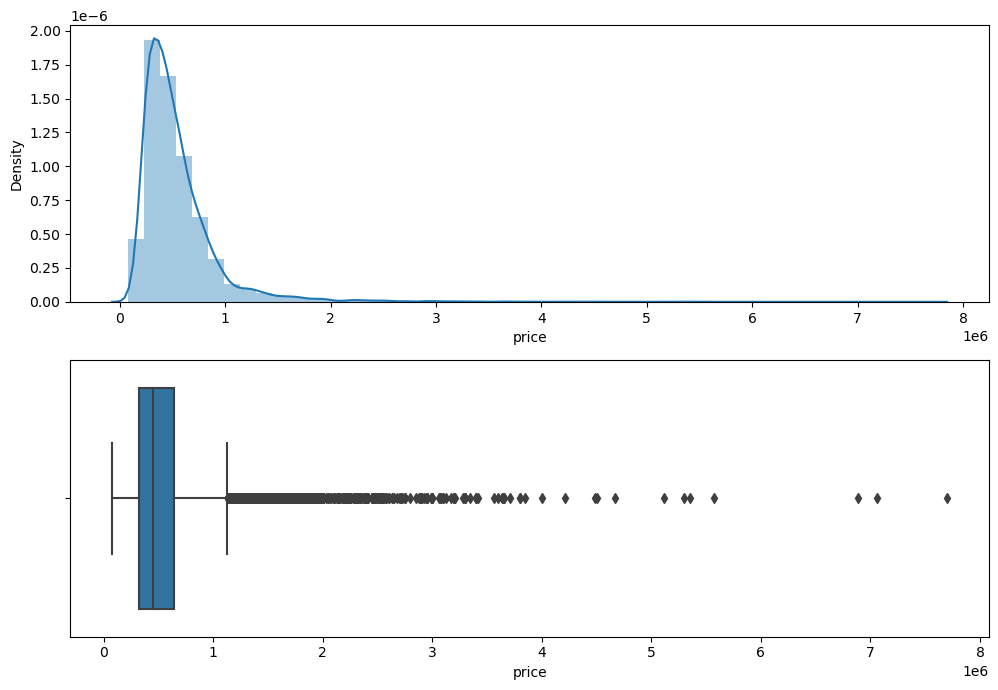

In [24]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['price'])
plt.tight_layout()

### Visualizing square footage of (home,lot,above and basement)

C:\Users\Irthiqua Moin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Irthiqua Moin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Irthiqua Moin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

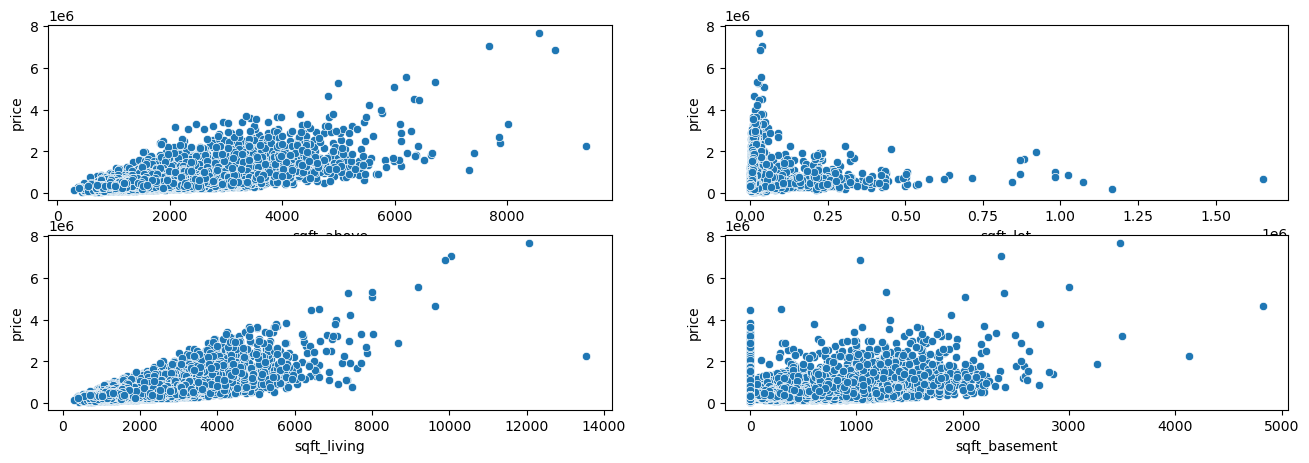

In [5]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['sqft_above'], Data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['sqft_lot'],Data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['sqft_living'],Data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['sqft_basement'],Data['price'])

### Visualizing bedrooms,bathrooms,floors,grade

C:\Users\Irthiqua Moin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Irthiqua Moin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Irthiqua Moin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

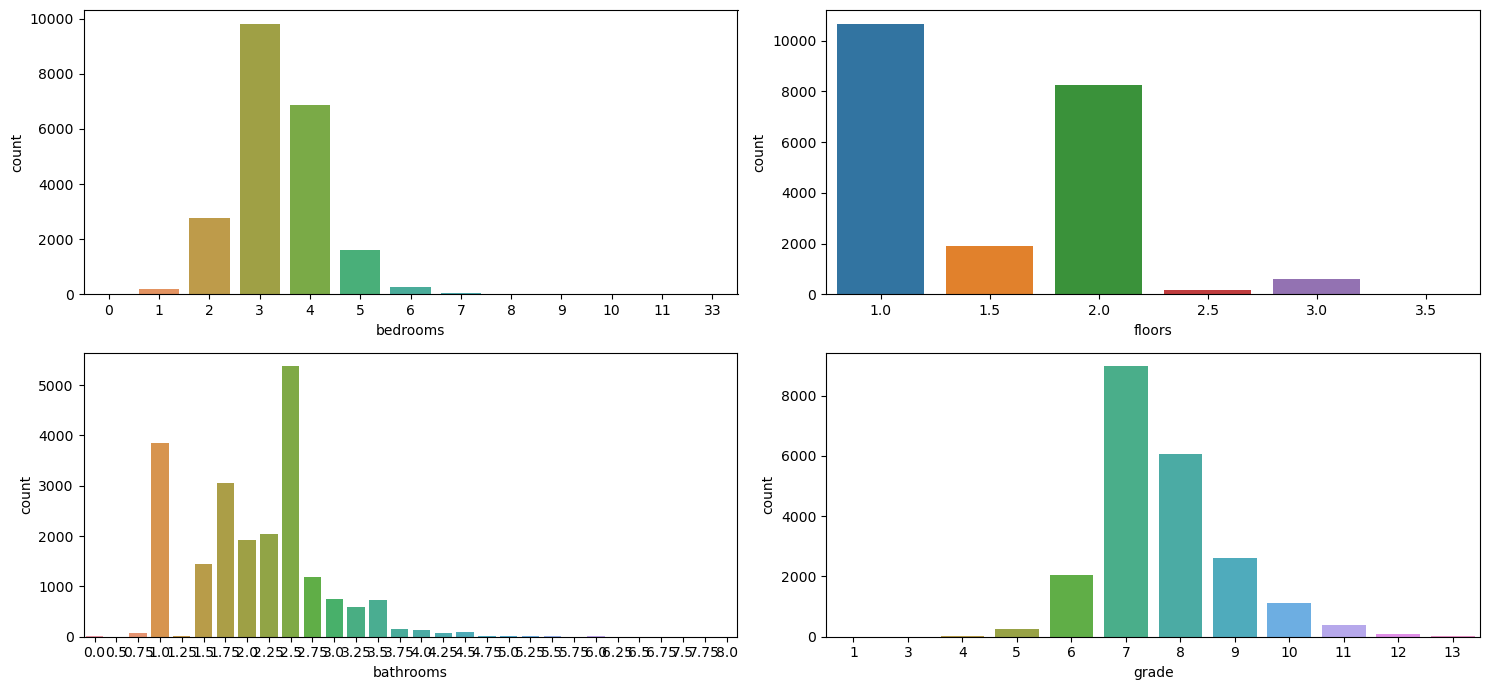

In [6]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(Data['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(Data['floors'])
fig.add_subplot(2,2,3)
sns.countplot(Data['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(Data['grade'])
plt.tight_layout()

### let's break date to years, months

In [7]:
Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)

### Data visualization house price vs months and years

<AxesSubplot:xlabel='year'>

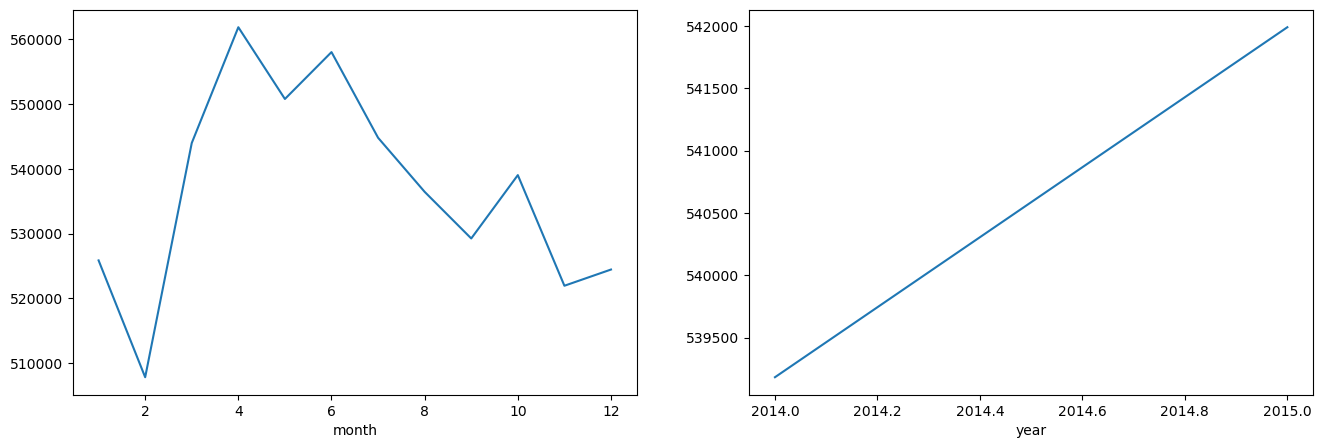

In [8]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

### Checking if there are any Null values

In [9]:
Data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

### Drop some unnecessary columns


In [10]:
Data = Data.drop('date',axis=1)
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)

Features (X): The columns that are inserted into our model will be used to make predictions.           
Prediction (y): Target variable that will be predicted by the features

In [11]:
X = Data.drop('price',axis =1).values
y = Data['price'].values

### Splitting Train and Test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

### Standardization scaler - fit&transform on train, fit only on test

In [13]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

C:\Users\Irthiqua Moin\AppData\Local\Temp\ipykernel_9132\2310471181.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
C:\Users\Irthiqua Moin\AppData\Local\Temp\ipykernel_9132\2310471181.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype

### Multiple Liner Regression

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

### Evaluate the model (intercept and slope)

In [15]:
print(regressor.intercept_)
print(regressor.coef_)

540068.0331492655
[-32174.2645862   28314.47160234  80960.83654889   6428.24177905
   3413.70406639  49942.35152741  36835.82051685  21903.68879982
 116003.40529456  76073.5117404   25375.83805414 -72994.52529983
   7676.57141888  78057.84710672 -17254.48220907  18909.70160034
 -10301.37920458   4182.48580611  17081.43533197]


### Predicting the test set result

In [16]:
y_pred = regressor.predict(X_test)

### Showing results as a DataFrame

In [17]:
coeff_df = pd.DataFrame(regressor.coef_, Data.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df

,Coefficient
bedrooms,-32174.264586
bathrooms,28314.471602
sqft_living,80960.836549
sqft_lot,6428.241779
floors,3413.704066
waterfront,49942.351527
view,36835.820517
condition,21903.688800
grade,116003.405295
sqft_above,76073.511740


### Visualizing residuals

C:\Users\Irthiqua Moin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

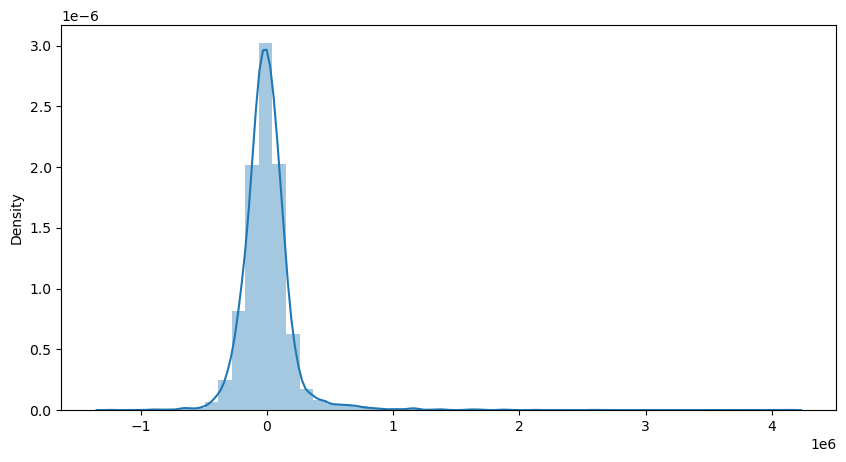

In [18]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

### Comparing actual output values with predicted values

In [19]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
0,349950.0,530667.784120
1,450000.0,667025.076946
2,635000.0,553195.043391
3,355500.0,346657.166101
4,246950.0,61378.186019
5,406550.0,481162.809294
6,350000.0,312819.788488
7,226500.0,273833.027682
8,265000.0,280571.649291
9,656000.0,532966.844438


### Evaluating the performance of the algorithm (MAE - MSE - RMSE)


In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 125933.74319633955
MSE: 40601153229.61856
RMSE: 201497.27846702686
VarScore: 0.7039747986273114


In [22]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [23]:
regressor.score(X_test,y_test)

0.8727456466184821